# Data Analysis by Ruby's Data Tools

In this notebook, you can learn how to perform data analysis with Ruby's data tools.

## Data tools used in this notebook

You will use the following tools below.

- daru: a library providing data frame features (like pandas in Python)
- rbplotly: a library visualizing data with Plotly

## Let's prepare the data set

This notebook uses Titanic data set provided by Kaggle.

To download the data set, access the following site, and click `Whole dataset` link next to the `CSV` label:

- <https://public.opendatasoft.com/explore/dataset/titanic-passengers/export/>

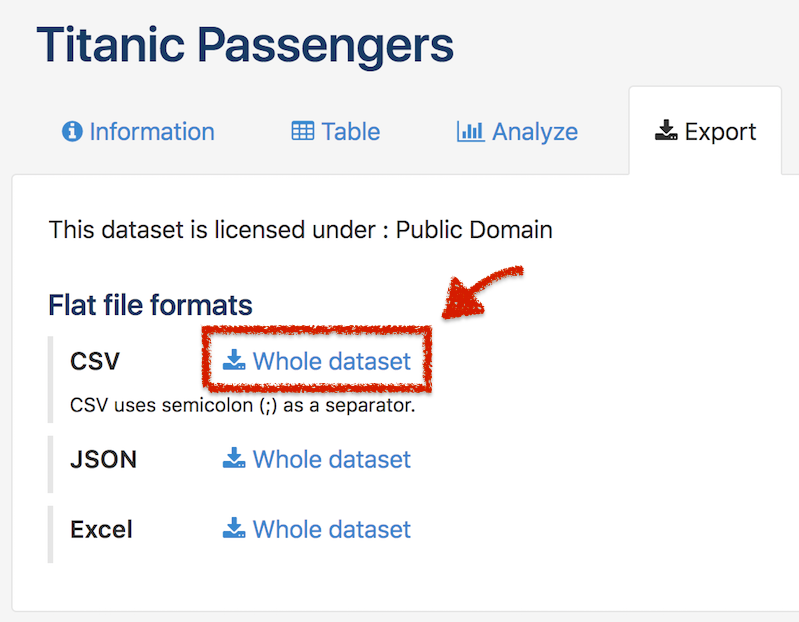

Then let's check the downloaded file. The downloaded file is probably named `titanic-passengers.csv`. Please move the file into the `rubykaigi2018` repository.  After that, you can see the file in Jupyter Notebook's top page.

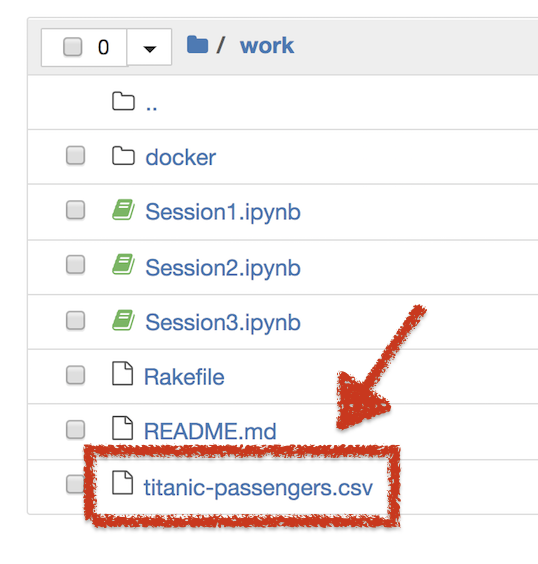

## Titanic Dataset

Titanic Dataset is a list of Titanic passengers.  A record in the data consists of the following fields.


| Name | Type | Description |
| --- | --- | --- |
| PassengerId | integer | The ID of passengers |
| Survived | `No` / `Yes` | 1 is alive, 0 is dead |
| Pclass | `1` / `2` / `3` | The class of passengers |
| Name | string | The name of passengers |
| Sex | `male` / `female` | The sex of passengers |
| Age | intgeger | The age of passengers |
| SibSp	| integer | |
| Parch	| integer | |
| Ticket | string |	Ticket No. |
| Fare | float | The price of the ticket |
| Cabin	| string | The cabin number |
| Embarked | `C` / `S` / `Q` | The initial of the name of the embarked port |


## Loading the data

Using daru, let's create the data frame of this data.
At first, we should load daru.

In [1]:
require 'daru'

true

Next, load the file `titanic-passengers.csv` by using `Daru::DataFrame.from_csv` method, and store the result of data frame into the variable `df`.  Note that the column separator of this file is `;`, so you should specify `col_sep: ';'`.

In [2]:
df = Daru::DataFrame.from_csv('titanic-passengers.csv', col_sep: ';')
nil

The last `nil` supresses printing whole the data frame.  If you drop the `nil`, the contents of `df` is displayed following the cell (you can try it).

## Look into the data

You can check the number of records in the data by `df.size`.

In [3]:
df.size

891

`df.head` shows the first 10 lines of the data.

In [4]:
df.head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,155,No,3,"Olsen, Mr. Ole Martin",male,,0,0,Fa 265302,7.3125,,S
1,162,Yes,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Milne)",female,40.0,0,0,C.A. 33595,15.75,,S
2,163,No,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.775,,S
3,227,Yes,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5,,S
4,241,No,3,"Zabour, Miss. Thamine",female,,1,0,2665,14.4542,,C
5,324,Yes,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)",female,22.0,1,1,248738,29.0,,S
6,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0,,S
7,351,No,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.225,,S
8,363,No,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,,C
9,409,No,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.775,,S


And, `df.tail` shows the last 10 lines of data.

In [5]:
df.tail

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,335,Yes,1,"Frauenthal, Mrs. Henry William (Clara Heinsheimer)",female,,1,0,PC 17611,133.65,,S
882,420,No,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.15,,S
883,469,No,3,"Scanlan, Mr. James",male,,0,0,36209,7.725,,Q
884,477,No,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0,,S
885,546,No,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0,,S
886,630,No,3,"O'Connell, Mr. Patrick D",male,,0,0,334912,7.7333,,Q
887,651,No,3,"Mitkoff, Mr. Mito",male,,0,0,349221,7.8958,,S
888,676,No,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.775,,S
889,868,No,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
890,880,Yes,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


You can specify the number of lines you want to get by the argument.

If you want to the first 3 lines, you can do `df.head(3)`.

In [6]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,155,No,3,"Olsen, Mr. Ole Martin",male,,0,0,Fa 265302,7.3125,,S
1,162,Yes,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Milne)",female,40.0,0,0,C.A. 33595,15.75,,S
2,163,No,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.775,,S


And, you can do `df.tail(4)` to get the last 4 lines.

In [7]:
df.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,651,No,3,"Mitkoff, Mr. Mito",male,,0,0,349221,7.8958,,S
888,676,No,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.775,,S
889,868,No,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
890,880,Yes,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


If you want to slice the middle lines, you can specify the range of lines by the array style reference form like:

In [8]:
df.row[13..15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,619,Yes,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0,F4,S
14,626,No,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S
15,628,Yes,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S


## Statistical properties of the data

`df.describe` method tells us the statistical summary of the data.

In [9]:
df.describe

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891,891,714,891,891,891
mean,446.0,2.308641975308642,29.69911764705882,0.5230078563411896,0.38159371492704824,32.2042079685746
std,257.3538420152301,0.8360712409770518,14.526497332334047,1.1027434322934282,0.8060572211299567,49.69342859718094
min,1,1,0.42,0,0,0.0
max,891,3,80.0,8,6,512.3292


Unlike pandas, daru reports only descriptive statistics such as mean and standard deviation.
If you want order statistics such as median, you need to specify explicitly. But currently `median` is only supported.

In [10]:
df.describe([:median])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
median,446,3,28.0,0,0,14.4542


Now daru doesn't support to report percentile in the result of `describe` method.  But you can do it by adding two methods in `Daru::Vector` like:

In [11]:
class Daru::Vector
  def first_quartile
    percentile(25)
  end
  
  def last_quartile
    percentile(75)
  end
end

df.describe([:min, :first_quartile, :median, :last_quartile, :max])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
min,1,1,0.42,0,0,0.0
first_quartile,223,2,20.0,0,0,7.8958
median,446,3,28.0,0,0,14.4542
last_quartile,669,3,38.0,1,0,31.0
max,891,3,80.0,8,6,512.3292


As you can see in the `Age` column in the above tables, the average age of the passengers is about 30, the youngest is 0 years old, and the oldest is 80 years old.  By this simple statistical summary, you can know the characteristics of the given data.  Daru can help you see such information.

## Visualizing data

Next, let's visualize the distribution of the following fields:

- `Survived`
- `Pclass`
- `Age`
- `Sex`
- `SibSp`
- `Parch`
- `Fare`
- `Embarked`

For visualization, we use rbplotly in this notebook.

In [12]:
require 'rbplotly'

true

As rbplotly is just a thin wrapper for [Plotly JS API](https://plot.ly/javascript/), you can use all the functions of Plotly JS API from Ruby.

`show_histograms` method defined in the next code cell builds the histograms for the given fields and allocate these figures in matrix layout.


In [13]:
def show_histograms(dataframe, names, layout: nil)
  layout ||= {}
  raise ArgumentError, "layout must be a Hash" unless layout.kind_of? Hash

  # each hash in traces specifies the properties of a single chart
  traces = names.map.with_index do |name, i|
    axis_index = i == 0 ? '' : i + 1
    {
      x: dataframe[name].to_a,  # specify samples in `x` for histogram
      name: name,
      type: :histogram,
      xaxis: "x#{axis_index}",
      yaxis: "y#{axis_index}",
      nbinsx: 20
    }
  end

  # chart layout calculation

  ncol = 2
  nrow = (names.length + 1) / ncol
  grid_width = 1.0 / ncol
  grid_height = 1.0 / nrow
  sep = 0.02

  trace_index = 0
  nrow.times do |row|
    ncol.times do |col|
      axis_index = trace_index == 0 ? '' : trace_index + 1
      # build the layout hash for allocating each chat
      layout[:"xaxis#{axis_index}"] = {
        domain: [col * grid_width + sep, (col + 1) * grid_width - sep],
        anchor: "y#{axis_index}"
      }
      layout[:"yaxis#{axis_index}"] = {
        domain: [row * grid_height + sep, (row + 1) * grid_height - sep],
        anchor: "x#{axis_index}"
      }
      trace_index += 1
    end
  end
  Plotly::Plot.new(data: traces, layout: layout).show
end

:show_histograms

Let's use this method to render histograms for the columns.

In [14]:
num_column_names = %w[Survived Pclass Sex Age SibSp Parch Fare Embarked]
show_histograms(df, num_column_names, layout: { height: 700 }) # Total figure height

#<Plotly::Offline::HTML:0x0000000003487738 @id="df2824c6-359f-4366-a9d2-c052ea9ff3cc", @data=[{:x=>["No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "No", "No", "No", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "Yes", "Yes", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "Yes", "No", "No", "No", "No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes", "No", "Yes", "Yes", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "No", "Ye

#<CZTop::Socket::PUB:0x212f790 last_endpoint="tcp://127.0.0.1:57679">

Let's see the same histograms only for male passengers.

You can filter the records by `df.filter` method.  The filtering conditions is specified in the block following the method. `:row` argument means the iteration scans rows.

In [15]:
df_male = df.filter(:row) {|r| r['Sex'] == 'male' }  # filtering rows by Sex column
show_histograms(df_male, num_column_names, layout: { height: 700 })

#<Plotly::Offline::HTML:0x0000000003ca3278 @id="aa534838-d56e-4a43-a539-a02c105216be", @data=[{:x=>["No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No"], :name=>"Survived", :type=>:histogram, :xaxis=>"x", :yaxis=>"y", :nbinsx=>20}, {:x=>[3, 3, 2, 2, 3, 3, 3, 3, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 1, 3, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 1

#<CZTop::Socket::PUB:0x212f790 last_endpoint="tcp://127.0.0.1:57679">

By changing the condition, you can show the same histograms only for female passengers.

In [16]:
df_female = df.filter(:row) {|r| r['Sex'] == 'female' }  # filtering rows by Sex column
show_histograms(df_female, num_column_names, layout: { height: 700 })

#<Plotly::Offline::HTML:0x00000000045acba8 @id="9720a64c-9fb7-43cf-be7a-4bf921d2ea59", @data=[{:x=>["Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "No", "Yes"], :name=>"Survived", :type=>:histogram, :xaxis=>"x", :yaxis=>"y", :nbinsx=>20}, {:x=>[2, 3, 2, 3, 3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 3, 1, 3, 1, 1, 1, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 1, 1, 1, 2, 3, 1, 2, 2, 1, 3, 1, 2, 3, 1, 3, 3, 3, 2, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 2, 3, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 2, 3, 2, 1, 1, 3, 3, 2, 1, 1, 3, 3, 1, 2, 3, 2, 1, 3, 3, 3, 2, 2, 3, 3, 3, 1, 1, 2, 2, 3, 2, 2, 3, 3, 2, 1, 1, 1, 2, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 3, 2, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 3, 3, 1, 3, 3, 2, 1, 1, 1, 1, 2, 3, 1, 3, 3, 3, 3, 1, 3, 1, 3, 3, 2, 3, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 2, 1, 1, 2, 3, 1, 3, 1, 1, 1, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 3, 2, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 3, 2, 3, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2, 1, 2, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1, 1, 3, 1], :name=>"Pclass", :type=>:histogram, :xaxis=>"x2", :yaxis=>"y2", :nbinsx=>20}, {:x=>["female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "female", "

#<CZTop::Socket::PUB:0x212f790 last_endpoint="tcp://127.0.0.1:57679">

Making clear the differences between male and female, merge the histograms for male and female by changing bar colors.

The following method renders such histograms.

In [17]:
def show_histograms_overlay_about_sex(dataframe, names, layout: nil)
  layout ||= {}
  raise ArgumentError, "layout must be a Hash" unless layout.kind_of? Hash

  group_by_sex = dataframe.group_by('Sex')
  male = group_by_sex.get_group(['male'])
  female = group_by_sex.get_group(['female'])

  # each hash in traces specifies the properties of a single chart
  traces = names.map.with_index { |name, i|
    axis_index = i == 0 ? '' : i + 1
    [
      {
        x: male[name].to_a,
        name: "#{name} (male)",
        type: :histogram,
        xaxis: "x#{axis_index}",
        yaxis: "y#{axis_index}",
        nbinsx: 20
      },
      {
        x: female[name].to_a,
        name: "#{name} (female)",
        type: :histogram,
        # specifying same xaxis and yaxis let plotly combine charts into one
        xaxis: "x#{axis_index}",
        yaxis: "y#{axis_index}",
        nbinsx: 20
      }
    ]
  }.flatten

  # chart layout calculation

  ncol = 2
  nrow = (names.length + 1) / ncol
  grid_width = 1.0 / ncol
  grid_height = 1.0 / nrow
  sep = 0.02

  trace_index = 0
  nrow.times do |row|
    ncol.times do |col|
      axis_index = trace_index == 0 ? '' : trace_index + 1
      # build the layout hash for allocating each chat
      layout[:"xaxis#{axis_index}"] = {
        domain: [col * grid_width + sep, (col + 1) * grid_width - sep],
        anchor: "y#{axis_index}"
      }
      layout[:"yaxis#{axis_index}"] = {
        domain: [row * grid_height + sep, (row + 1) * grid_height - sep],
        anchor: "x#{axis_index}"
      }
      trace_index += 1
    end
  end
  Plotly::Plot.new(data: traces, layout: layout).show
end

:show_histograms_overlay_about_sex

Let's use this method to render histograms.

In [18]:
show_histograms_overlay_about_sex(df, num_column_names, layout: { height: 700 })

#<Plotly::Offline::HTML:0x0000000004818b80 @id="5cb08040-81ac-4bf2-9ac8-0d5fb37b0898", @data=[{:x=>["No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "Yes", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "Yes", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "No", "Yes", "No", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "Yes", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No", "No"], :name=>"Survived (male)", :type=>:histogram, :xaxis=>"x", :yaxis=>"y", :nbinsx=>20}, {:x=>["Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "

#<CZTop::Socket::PUB:0x212f790 last_endpoint="tcp://127.0.0.1:57679">

The differences between male and female are easy to recognize in the merged histograms. For example, living female passengers were more than male.

As you can see in this notebook, using only Ruby's data tools, we can investigate the characteristics of the given data.

## Issues of Ruby's Data Tools

Although we used only daru and rbplotly in the above instructions, I think you can find some difficulties of Ruby's data tools.

### Difficulties of daru

In daru, filtering data isn't easy to write as pandas is.  Let's recall the following code:

```ruby
df_male = df.filter(:row) {|r| r['Sex'] == 'male' }   # daru's notation
```

Pandas allows us to write the same thing as:

```python
df_male = df[df['Sex'] == 'male']   # pandas's notation (similar to R's notation)
```

The pandas notation is easy to write. And the pandas notation is standard form in data science field.  So I think daru should support the pandas notation.

### Difficulties of rbplotly

The issues of rbplotly is that rbplotly is just a thin wrapper for Plotly JS API.
I think rplotly should provide the similar API of Plotly Python API, such as subplot and figure factory.

- [The documentation of figure factory API](https://plot.ly/python/figure-factory-subplots/)

## Conclusion

In this notebook, simple data analysis process was performed only by Ruby's data tools.  After that, the existing issues of Ruby's data tools were explained.